# Concurrency and Asynchrony

## Process And Thread  

<div dir="rtl"><b> پردازش (Process)</b> در سیستم عامل: یک پردازش در سیستم عامل به مجموعه‌ای از منابع اختصاص داده شده برای اجرای یک برنامه گفته می‌شود. این منابع شامل حافظه (RAM)، محدوده‌های آدرس، فایل‌های باز، دستگاه‌های ورودی/خروجی و غیره می‌شود. هر پردازش یک محیط منزوی ایجاد می‌کند که در آن برنامه اجرا می‌شود. این انزوا به معنای آن است که فرآیندها نمی‌توانند به طور مستقیم به منابع مربوط به یکدیگر دسترسی پیدا کنند، مگر از طریق روش‌های ارتباطی صریحاً تعریف شده.</div>  


<div dir="rtl"><b>نخ (Thread): </b>  
نخ یا Thread، واحد اصلی اجرایی در یک پردازش است که توسط سیستم عامل زمان‌بندی و مدیریت می‌شود. هر نخ می‌تواند دستورالعمل‌های مستقلی را اجرا کند، و هر پردازش می‌تواند شامل یک یا چندین نخ باشد. نخ‌ها در یک پردازش می‌توانند منابع مشترکی مانند حافظه را به اشتراک بگذارند، اما هر نخ دارای مجموعه‌ای از وضعیت‌های خاص خود مانند مقادیر رجیستر، اشاره‌گر نخ و اولویت‌های زمان‌بندی است.
</div>

`OS` => create single thread (`main` thread) => run `app`.  
<br />
> The CLR creates other threads behind the scenes for garbage collection and finalization.

In [ ]:
// NB: All samples in this chapter assume the following namespace imports:
using System;
using System.Threading;

Thread t = new Thread (WriteY); // Kick off a new thread
t.Start(); // running WriteY()

// Simultaneously, do something on the main thread.
for (int i = 0; i < 50; i++) Console.Write ("x");
void WriteY()
{
for (int i = 0; i < 50; i++) Console.Write ("y");
}


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxyyyyyyyyxxxxxxxxxxxxxxxxxxxxxyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy

`OS` allocate `slices` of time to each thread (typically 20 ms in Windows) by `Scheduler`

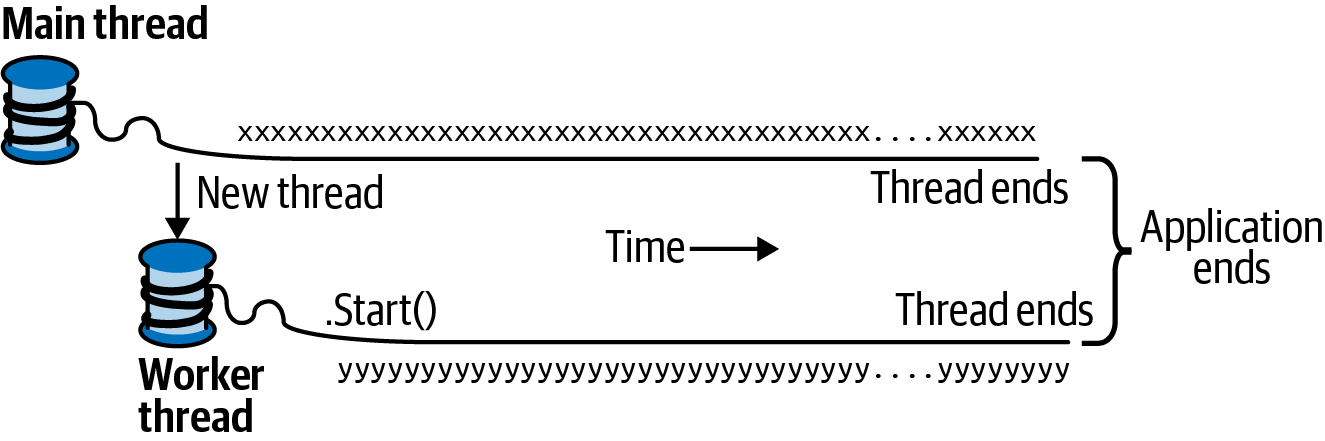

On a `multicore` or `multiprocessor` machine, the two threads can genuinely execute in parallel.
<br/> 

But again, x and y will be printed alternately.(why?)

when `thread` start => `IsAlive` property return `true`.  

When does the `thread` stop? => when the `delegate` finishes executing.

after `thread` stop, it cannot `restart`. 

In [1]:
using System;
using System.Threading;

Thread t1 = new Thread(testThreadIsLive);
t1.Start();
Console.WriteLine(t1.IsAlive);

await Task.Delay(1000);

Console.WriteLine(t1.IsAlive);

void testThreadIsLive(){
    Console.WriteLine("test Thread IsLive;");
}

True
test Thread IsLive;
False


Each `thread` has a `Name` property.  

`name` is displayed in the `Threads Window`.  

You can set a thread’s name just once

In [3]:
var t1 = new Thread(t1Delegate);
var t2 = new Thread(t2Delegate);

t1.Name = "test1";
t2.Name = "test2";

t1.Start();
t2.Start();

void t1Delegate()
{
    Task.Delay(5000).Wait();
    Console.WriteLine (Thread.CurrentThread.Name);
}

void t2Delegate()
{
    Task.Delay(10000).Wait();
    Console.WriteLine (Thread.CurrentThread.Name);
}

Task.Delay(3000).Wait();

Console.WriteLine($"test1: {t1.IsAlive} and test2: {t2.IsAlive}");

Task.Delay(3000).Wait();

Console.WriteLine($"test1: {t1.IsAlive} and test2: {t2.IsAlive}");

Task.Delay(5000).Wait();

Console.WriteLine($"test1: {t1.IsAlive} and test2: {t2.IsAlive}");

test1: True and test2: True
test1
test1: False and test2: True
test2
test1: False and test2: False


## Preemption (جلوگیری از اجرا)


<div dir="rtl"> 
پیشگیری از اجرا زمانی رخ می‌دهد که یک نخ در حال اجرا به طور موقت متوقف می‌شود تا به نخ دیگری اجازه داده شود تا اجرا شود. این کار توسط برنامه‌ریز (Scheduler) سیستم عامل انجام می‌شود، که مسئول تخصیص زمان پردازنده به نخ‌های مختلف است.

چرا اتفاق می‌افتد؟ پیشگیری به سیستم عامل این امکان را می‌دهد تا منابع را به طور موثرتری بین نخ‌های مختلف تقسیم کند و اطمینان حاصل کند که برنامه‌های با اولویت بالاتر دسترسی سریع‌تری به پردازنده دارند. همچنین به جلوگیری از گرسنگی نخ‌ها کمک می‌کند، که در آن یک یا چند نخ به دلیل کمبود منابع قادر به اجرا نیستند.

اثرات بر برنامه‌نویسی: درک پیشگیری از اجرا برای برنامه‌نویسان مهم است، زیرا می‌تواند تاثیرات قابل توجهی بر روی رفتار برنامه داشته باشد. به عنوان مثال، زمانی که دو نخ به منابع مشترک دسترسی دارند، پیشگیری می‌تواند منجر به شرایط مسابقه شود، جایی که نتیجه اجرا به ترتیب زمان‌بندی نخ‌ها بستگی دارد. این می‌تواند باعث خطاهای دشوار در رفع اشکال شود، به خصوص اگر برنامه‌نویسی متوجه نشود که کد در یک محیط چندنخی اجرا می‌شود.

کاربردها در عیب‌یابی: اغلب زمانی که مشکلی در یک برنامه رخ می‌دهد، پیشگیری از اجرا به عنوان یک عامل محتمل بررسی می‌شود. برای مثال، اگر داده‌های به اشتراک گذاشته شده بین نخ‌ها به طور غیرمنتظره‌ای تغییر کند، ممکن است این تغییر به دلیل توقف نخ در حین پیشگیری و اجرای نخ دیگر باشد که منجر به دسترسی همزمان به داده‌ها شده است.

</div>

## Join and Sleep

You can `wait` for another thread to end by calling its `Join` method

In [2]:
Thread t = new Thread (Go);
t.Start();
t.Join();
Console.WriteLine ("Thread t has ended!");
void Go() { for (int i = 0; i < 1000; i++) Console.Write ("y"); }

yyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy

In [ ]:
var t = new Thread(waitForSqlExecution);
t.Start();
var checkSmallerThad1Second = t.Join(1000);
if (checkSmallerThad1Second)
    Console.WriteLine("sql execution is very good");
else
    Console.WriteLine("sql execution is not good");

Thread.Sleep(2000);

void waitForSqlExecution()
    {
        Thread.Sleep(2000);
        Console.WriteLine($"end {nameof(waitForSqlExecution)} method");
    }

`Thread.Sleep(0)` 
<div dir="rtl">
وقتی Thread.Sleep(0) فراخوانی می‌شود، نخ فعلی به سیستم عامل اعلام می‌کند که زمان‌بندی (Time Slice) خود را که به آن اختصاص داده شده بود، به طور داوطلبانه رها می‌کند. این کار به سیستم عامل اجازه می‌دهد تا زمان پردازنده را به نخ‌های دیگری اختصاص دهد که آماده اجرا هستند.
</div>

`Thread.Yield()`  

<div dir="rtl">عملکرد: Thread.Yield() نیز به نخ فعلی امکان می‌دهد تا زمان‌بندی خود را به طور داوطلبانه رها کند، اما با این تفاوت که فقط به نخ‌هایی که در همان پردازنده (Processor) اجرا می‌شوند، فرصت اجرا می‌دهد.</div>

<div dir="rtl">استفاده از <code>Thread.Sleep(0)</code> و <code>Thread.Yield()</code> نه تنها می‌تواند در موارد خاص به بهبود عملکرد کمک کند، بلکه به عنوان ابزاری برای شناسایی مشکلات پیچیده همزمانی در برنامه‌های چندنخی نیز عمل می‌کند.</div>

## Blocking

when execution is paused => thread is `blocked`  

`blocked` thread immediately yields its processor `time slice`

In [3]:
using System.Threading;

var t =new Thread(testBlockingState);

var blocked = (t.ThreadState & ThreadState.WaitSleepJoin) != 0;

void testBlockingState(){}

Console.WriteLine(t.ThreadState);

Unstarted


In [ ]:
var bit1 = 0b1;
var bit2 =0b10;
var bit4 =0b100;
var bit8 =0b1000;
Console.WriteLine((bit8 & bit4));
Console.WriteLine((bit8 & bit8));
Console.WriteLine((bit4 & bit1));

var bit3 =0b11;
Console.WriteLine((bit3 & bit2));
Console.WriteLine((bit3 & bit1));

## Context Switch

<div dir="rtl"> اشاره به فرآیندی دارد که در آن سیستم عامل از اجرای یک نخ جاری به نخ دیگری جابجا می‌شود. این امر معمولاً زمانی رخ می‌دهد که نخ فعلی منتظر منابع (مانند داده‌ها از یک فایل یا پایگاه داده) شود یا زمانی که نخی با اولویت بالاتر نیاز به اجرا دارد. 
<br/><br/>
زمینه نخ: زمینه یک نخ شامل تمام اطلاعات لازم برای اجرای آن نخ است، مانند مقادیر رجیستر، اشاره‌گرهای پشته (Stack Pointer)، و اطلاعات حالت برنامه.</div>

### فرآیند تعویض thread  

<div dir="rtl">ذخیره‌سازی زمینه فعلی: سیستم عامل زمینه فعلی نخ جاری را ذخیره می‌کند تا بتواند بعداً به اجرای آن نخ برگردد.
بارگذاری زمینه نخ جدید: سپس زمینه نخ بعدی که قرار است اجرا شود را بارگذاری می‌کند. این شامل تنظیم رجیسترها و دیگر اطلاعات حالت به مقادیر مناسب برای نخ جدید است.
اجرای نخ جدید: پس از تنظیم زمینه برای نخ جدید، سیستم عامل اجرای آن نخ را آغاز می‌کند.</div>

## Blocking versus Spinning

`I/O-bound` : An operation that spends most of its time waiting for something to happen  
  
`compute-bound` : an operation that spends most of its time performing CPU-intensive work

### blocking

<div dir="rtl">
<b>تعریف</b>: مسدود سازی اتفاق می‌افتد زمانی که نخی در انتظار اتفاقی خاص (مانند تکمیل عملیات ورودی/خروجی یا آزادسازی قفل) باشد و در این زمان، منابع پردازشی (CPU) را آزاد می‌کند.  <br/>
چگونگی کارکرد: زمانی که یک نخ مسدود می‌شود، سیستم عامل آن نخ را از حالت اجرا خارج می‌کند و منابع پردازشی را به نخ‌های دیگر اختصاص می‌دهد. نخ در این حالت هیچ منبع CPU‌ای مصرف نمی‌کند.

</div>

In [ ]:
while (DateTime.Now < DateTime.Now.AddMinutes(30))
Thread.Sleep (100);

### Spinning

<div dir="rtl">

تعریف: چرخش زمانی رخ می‌دهد که نخ به طور فعال در حالت انتظار بماند، معمولاً با اجرای یک حلقه بی‌پایان تا زمانی که شرط خاصی برآورده شود. <br/>
چگونگی کارکرد: در حالت چرخش، نخ همچنان منابع CPU را اشغال می‌کند حتی اگر کار مفیدی انجام ندهد. این کار می‌تواند منجر به هدر رفت منابع شود چون نخ دیگری نمی‌تواند از CPU استفاده کند.

</div>

In [ ]:
while (DateTime.Now < DateTime.Now.AddMinutes(30));

## Local Versus Shared State

In [ ]:
new Thread (Go).Start(); // Call Go() on a new thread
Go(); // Call Go() on the main thread
void Go()
{
    // Declare and use a local variable - 'cycles'
    for (int cycles = 0; cycles < 5; cycles++) 
        Console.Write ('?');
}

The `CLR` assigns each thread its `own memory stack` so that local variables are kept separate.

In [ ]:
bool _done = false;
new Thread (Go).Start();
Go();
void Go()
{
    if (!_done) { _done = true; Console.WriteLine ("Done"); }
}

In [6]:
bool done = false;
ThreadStart action = () =>
{
    if (!done) { done = true; Console.WriteLine ("Done"); }
};
new Thread (action).Start();
action();

Done


In [7]:
var tt = new ThreadTest();
new Thread (tt.Go).Start();
tt.Go();
class ThreadTest
{
    bool _done;
    public void Go()
    {
        if (!_done) { _done = true; Console.WriteLine ("Done"); }
    }
}

Done


In [27]:
ThreadTest.Main();

class ThreadTest
{
    static bool _done; // Static fields are shared between all threads
// in the same process.
    public static void Main()
    {
        new Thread (Go).Start();
        Go();
    }
    static void Go()
    {
        if (!_done) { _done = true; Console.WriteLine ("Done"); }
    }
}

Done


it’s possible (though unlikely) that `Done` could be printed `twice`.

In [ ]:
ThreadTest.Main();

class ThreadTest
{
    static bool _done; // Static fields are shared between all threads
// in the same process.
    public static void Main()
    {
        new Thread (Go).Start();
        Go();
    }
    static void Go()
    {
        if (!_done) {  Console.WriteLine ("Done"); _done = true;}
    }
}

## Thread Safety and Locking

In [ ]:
ThreadSafe.Main();

class ThreadSafe
{
    static bool _done;
    static readonly object _locker = new object();
    public static void Main()
    {
        new Thread (Go).Start();
        Go();
    }
    static void Go()
    {
        lock (_locker)
        {   
            if (!_done) { 
                _done = true; 
                Console.WriteLine ("Done");
            }
        }
    }
}

any `reference-type` object can be use for `lock`

Code that protected by lock way is `Thread Safe`

### Race Condition

`x++` problem.  
Read-Increment-Write maybe occurence at same time by two thread

In [42]:
RaceConditionExample.Main();

class RaceConditionExample
{
    private static int counter = 0;

    public static void Main()
    {
        Thread t1 = new Thread(IncrementCounter);
        Thread t2 = new Thread(IncrementCounter);
        
        t1.Start();
        t2.Start();
        
        t1.Join();
        t2.Join();
        
        Console.WriteLine($"Final counter value: {counter}");
    }

    static void IncrementCounter()
    {
        for (int i = 0; i < 100000; i++)
        {
            counter++;
        }
    }
}


Final counter value: 116017


### DeadLock

<div dir="rtl">

بن‌بست زمانی رخ می‌دهد که دو یا چند نخ به طور دائمی منتظر آزادسازی قفل‌هایی باشند که توسط یکدیگر در اختیار گرفته شده‌اند، و در نتیجه هیچ کدام نمی‌توانند ادامه پیدا کنند.

</div>

In [ ]:
using System;
using System.Threading;

class DeadlockExample
{
    private static readonly object lock1 = new object();
    private static readonly object lock2 = new object();

    static void Main()
    {
        new Thread(Thread1).Start();
        new Thread(Thread2).Start();
    }

    static void Thread1()
    {
        lock (lock1)
        {
            Console.WriteLine("Thread 1 acquired lock1");
            Thread.Sleep(1000); // Wait to ensure Thread 2 can lock lock2
            lock (lock2)
            {
                Console.WriteLine("Thread 1 acquired lock2");
            }
        }
    }

    static void Thread2()
    {
        lock (lock2)
        {
            Console.WriteLine("Thread 2 acquired lock2");
            Thread.Sleep(1000); // Wait to ensure Thread 1 can lock lock1
            lock (lock1)
            {
                Console.WriteLine("Thread 2 acquired lock1");
            }
        }
    }
}


## Passing Data to a Thread

In [ ]:
Thread t = new Thread (Print);
t.Start();
void Print () => Console.WriteLine ("Hello from t!");

In [ ]:
Thread t = new Thread ( () => Print ("Hello from t!") );
t.Start();
void Print (string message) => Console.WriteLine (message);

In [ ]:
Thread t = new Thread (Print ("Hello from t!"));
t.Start();
void Print (string message) => Console.WriteLine (message);

In [ ]:
Thread t = new Thread (Print);
t.Start("Hello from t!");
void Print (object message) => Console.WriteLine (message);

### Lambda expressions and captured variables

In [ ]:
for (int i = 0; i < 10; i++)
new Thread (() => Console.Write (i)).Start();

In [46]:
for (int i = 0; i < 10; i++)
{
    int temp = i;
    new Thread (() => Console.Write (temp)).Start();
}

1023456789

In [47]:
string text = "t1";
Thread t1 = new Thread ( () => Console.WriteLine (text) );
text = "t2";
Thread t2 = new Thread ( () => Console.WriteLine (text) );
t1.Start(); t2.Start();

t2
t2


## Exeption Handling

In [1]:
using System.Threading;
try
{
    new Thread (Go).Start();
}
catch (Exception ex)
{
    // We'll never get here!
    Console.WriteLine ("Exception!");
}
void Go() 
{ 
    throw null; 
} // Throws a NullReferenceException

<div dir="rtl">

نکته کلیدی اینجا این است که وقتی یک نخ (thread) جدید در C# ایجاد می‌شود، هر گونه بلوک try/catch/finally که در زمان ایجاد نخ در حال اجرا بوده، برای آن نخ جدید اعمال نمی‌شود. به عبارت دیگر، استثناهایی که در یک نخ جدید رخ می‌دهند، تحت تأثیر بلوک‌های try/catch/finally که قبل از شروع نخ وجود داشتند، قرار نمی‌گیرند. هر نخ دارای محدوده و مکانیزم کنترل استثنای خود است.

</div>

In [ ]:
using System.Threading;

new Thread (Go).Start();
void Go()
{
    try
    {
        throw null; // The NullReferenceException will get caught below
    }
    catch (Exception ex)
    {
        // Typically log the exception and/or signal another thread
        // that we've come unstuck
        Console.WriteLine ("Exception!");
    }
}

Exception!


## Foreground Versus Background Threads

As long as a `foreground thread` is active, the application is running. even if the `main thread` terminates

In [ ]:
using System.Threading;

static void Main (string[] args)
{
    Thread worker = new Thread ( () => Console.ReadLine() );
    if (args.Length > 0) worker.IsBackground = true;
    worker.Start();
}

if `args` is null => application still running for `ReadLine`.  
but if `args` in not null => `main thread` finish and application close.

In [ ]:
using System.Threading;

static void Main (string[] args)
{
    Thread worker = new Thread ( () => Console.ReadLine() );
    if (args.Length > 0) worker.IsBackground = true;
    worker.Start();
    worker.Join(); // application wait for background thread, 
    //special for finally blocks
    //we can use timeout for background threads, if the thread takes too long
}

The only difference between `foreground` and `background` threads, is how they `end`.

## Thread Priority

In [ ]:
enum ThreadPriority { Lowest, BelowNormal, Normal, AboveNormal, Highest }

<div dir="rtl">

 اولویت یک نخ تعیین می‌کند که نسبت به دیگر نخ‌های فعال در سیستم عامل، چه مقدار زمان اجرا به آن اختصاص داده می‌شود. 
<br/>
<br/>
افزایش اولویت یک نخ می‌تواند منجر به کمبود منابع برای نخ‌های دیگر شود، به این معنی که نخ‌های با اولویت پایین‌تر ممکن است فرصت کمتری برای اجرا پیدا کنند، که به این حالت "گرسنگی نخ‌ها" (thread starvation) گفته می‌شود.
<br/>
<br/>
برای اینکه یک نخ اولویت بالاتری نسبت به نخ‌های موجود در سایر فرآیندها داشته باشد، علاوه بر تنظیم اولویت نخ، باید اولویت فرآیند را نیز با استفاده از کلاس Process در فضای نام System.Diagnostics افزایش داد:
</div>

In [ ]:
using System.Diagnostics;

using Process p = Process.GetCurrentProcess();
p.PriorityClass = ProcessPriorityClass.High;


## Signaling

Sometimes, thread need to `wait` unti `receiving notification` form anothre thread

In [1]:
using System.Threading;

var signal = new ManualResetEvent (false);

new Thread (() =>
{
    Console.WriteLine ("Waiting for signal...");
    signal.WaitOne();
    signal.Dispose();
    Console.WriteLine ("Got signal!");
}).Start();

Thread.Sleep(2000);
signal.Set(); // “Open” the signal

Waiting for signal...
Got signal!


## The Thread Pool

<div dir="rtl">

هر زمان که یک نخ جدید (Thread) در برنامه‌ای ایجاد می‌شود، سیستم‌عامل باید منابعی را برای آن تخصیص دهد، از جمله یک استک متغیرهای محلی (Local Variable Stack) جدید. این فرایند، هرچند که سریع به نظر می‌رسد، می‌تواند صدها میکروثانیه زمان ببرد. در مواردی که برنامه‌ها به طور مکرر نخ‌های جدیدی ایجاد و پایان می‌دهند، این زمان تجمعی می‌تواند به کاهش کارایی کلی برنامه منجر شود.

</div>

 <div dir="rtl"><b>استخر نخ (Thread Pool) </b>یک راه‌حل برای این مسئله است. به جای ایجاد و حذف مکرر نخ‌ها، یک «استخر» از نخ‌های قبلاً ایجاد شده وجود دارد. این نخ‌ها آماده به کار هستند و می‌توانند برای اجرای وظایف جدید بازیافت شوند. زمانی که یک وظیفه جدید نیاز به اجرا دارد، یک نخ از استخر انتخاب شده و به جای صرف زمان برای ایجاد یک نخ جدید، به سرعت می‌تواند شروع به کار کند.</div>

A few points should be noted:  
- You cannot set the `Name` of a pooled thread, making debugging more difficult.
- Pooled threads are always `background` threads.
- Blocking pooled threads can degrade performance.
- You can set `priority`, when thread release back to pool, come back to normal.
- By `Thread.CurrentThread.IsThreadPoolThread` check thread is pool threads?

In [ ]:
using System.Threading.Tasks;
//using thread pool

Task.Run(()=> Console.WriteLine("Hello from the thread pool"));

## Hygiene in the thread pool

#### CPU Oversubscription

<div dir="rtl">
اشتراک‌گذاری بیش از حد CPU زمانی رخ می‌دهد که تعداد نخ‌های فعال (Active Threads) از تعداد هسته‌های CPU (CPU Cores) بیشتر باشد. در این حالت، سیستم‌عامل مجبور است بین نخ‌ها به طور مکرر جابجایی کند (Time-Slice Threads) تا هر کدام به نوبت بتوانند از CPU استفاده کنند.
</div>

مشکلات  
- تعویض زمینه (Context Switch)
- نابودی کش‌های CPU

<div dir="rtl">
<code>Thread Pool</code> به طور خودکار تعداد نخ‌های فعال را مدیریت می‌کند تا از اشتراک‌گذاری بیش از حد CPU جلوگیری شود. این کار با محدود کردن تعداد نخ‌هایی که همزمان می‌توانند کار کنند انجام می‌شود
</div>

<div dir="rtl">
استخر نخ نه تنها منابع را بهینه مصرف می‌کند و زمان تأخیر را کاهش می‌دهد، بلکه با مدیریت هوشمندانه‌ی تعداد نخ‌های فعال، به جلوگیری از اشتراک‌گذاری بیش از حد CPU و بهبود کارایی کلی سیستم کمک می‌کند. </div>

#### CLR and thread pool

<div dir="rtl">
در ابتدا، CLR تعدادی وظیفه موازی را برابر با تعداد هسته‌های سخت‌افزاری اجرا می‌کند.
</div>

<div dir="rtl">

CLR از یک الگوریتم صعود تپه (Hill-Climbing) استفاده می‌کند. این الگوریتم به طور مداوم بار کاری را در یک جهت خاص تنظیم می‌کند. اگر عملکرد (Throughput) بهبود یابد، در همان جهت ادامه می‌دهد؛ در غیر این صورت، جهت را تغییر می‌دهد. 

</div>

<div dir="rtl">

استراتژی CLR زمانی بهترین کارایی را دارد که دو شرط زیر برآورده شوند:

وظایف عمدتاً کوتاه‌مدت باشند: وظایفی که کمتر از 250 میلی‌ثانیه طول بکشند (یا به طور ایده‌آل کمتر از 100 میلی‌ثانیه) به CLR فرصت‌های بیشتری برای اندازه‌گیری و تنظیم عملکرد می‌دهند.

وظایفی که اکثر زمان خود را در انتظار (Blocked) سپری نمی‌کنند: وظایفی که بیشتر زمان خود را در حالت انتظار هستند، نباید در استخر نخ غالب باشند، زیرا می‌توانند فرآیند تنظیم بهینه‌سازی را دچار اختلال کنند.

</div>

#### Blocking انسداد

<div dir="rtl">
انسداد: انسداد در نخ‌ها زمانی رخ می‌دهد که نخ منتظر پایان یافتن یک عملیات خارجی مانند دسترسی به دیسک یا یک درخواست شبکه باشد. در این زمان، نخ نمی‌تواند کار مفیدی انجام دهد و منابع CPU را آزاد می‌کند.
</div>

<div dir="rtl">

تأثیر بر CLR: وقتی نخ‌های بسیاری در حال انسداد هستند، CLR ممکن است تصور کند که CPU تحت بار کاری سنگینی قرار گرفته است، در حالی که واقعاً اینطور نیست. این امر می‌تواند CLR را وادار به افزودن نخ‌های بیشتری به استخر نخ کند تا جبران این امر شود.

</div>

## Tasks 626

`thread` is a low-level tool for creating `concurrency`  
  

problem with `threads`
- return value
- chain operation
- handel exceptions



<div dir="rtl">
<b>تعریف : </b>

یک واحد کار غیرهمزمان است که شما می‌توانید اجرا کنید و مدیریت نمایید، که ممکن است فوراً انجام شود یا کمی طول بکشد. بر خلاف یک نخ سنتی که مستقیماً بر روی سخت‌افزار اجرا می‌شود، Task یک سطح بالاتری از انتزاع را ارائه می‌دهد و می‌تواند به صورت هوشمندانه‌تری منابع را مدیریت کند.

</div>

- represents a concurrent operation that might or `might not` be backed by a thread.
- They can use the `thread pool` to lessen startup latency
- when recive to `await`, thread come back to pool for other operations

Tasks use `pooled threads` by default, which are `background`
threads. This means that when the `main thread` ends, so do
any tasks that you create.

In [ ]:
Task.Run (() => Console.WriteLine ("Foo"));
Console.ReadLine();

<div dir="rtl">

Taskهای داغ: این Taskها بلافاصله پس از ایجاد، فعال و آماده اجرا هستند. نیازی به صدا زدن هیچ متد اضافی برای شروع کار آن‌ها نیست. Task.Run معمولاً برای ایجاد این نوع از Taskها استفاده می‌شود.
</div>

<div dir="rtl">
Taskهای سرد: در مقابل، Taskهای "سرد" با استفاده از کانستراکتور Task ایجاد می‌شوند و تا زمانی که صراحتاً با فراخوانی متد Start شروع به کار نکنند، فعال نمی‌شوند. این رویکرد به ندرت در عمل استفاده می‌شود زیرا مدیریت آن دشوارتر است و برنامه‌نویسان معمولاً ترجیح می‌دهند کار با Taskهایی که بلافاصله فعال می‌شوند و نیازی به مرحله اضافی برای شروع ندارند.
</div>

### Wail

Calling `Wait` on a task blocks current thread until it completes and is the equivalent of calling `Join` on a thread

### Long-running tasks

`tasks` ideal for short-running compute-bound work.

<div dir="rtl">
برای عملیات‌های طولانی‌مدت یا مسدودکننده، استفاده مستقیم از نخ‌های استخر نخ می‌تواند منجر به کاهش عملکرد شود چرا که این نخ‌ها برای کارهای کوتاه‌مدت طراحی شده‌اند و می‌توانند با اشغال شدن در طولانی‌مدت، منابع را محدود کنند.
<br>
برای مدیریت این نوع عملیات‌ها، .NET امکانی فراهم می‌کند تا Taskهایی با گزینه TaskCreationOptions.LongRunning ایجاد کنید. این گزینه به CLR اطلاع می‌دهد که Task مورد نظر احتمالا زمان زیادی برای اجرا نیاز دارد. در نتیجه، به جای استفاده از نخ‌های استخر نخ، CLR ممکن است تصمیم بگیرد یک نخ جدید برای اجرای این Task اختصاص دهد تا اطمینان حاصل شود که عملکرد استخر نخ تحت تأثیر قرار نمی‌گیرد.
</div>

In [ ]:
Task task = Task.Factory.StartNew (() => {/*LongRunning task*/},
TaskCreationOptions.LongRunning);

## Returning values

In [ ]:
Task<int> task = Task.Run (() => { Console.WriteLine ("Foo"); return 3; });

int result = task.Result; // Blocks if not already finished
Console.WriteLine (result); // 3

In [ ]:
Task<int> primeNumberTask = Task.Run (() =>
    Enumerable.Range (2, 3000000)
        .Count (n =>
            Enumerable.Range (2, (int)Math.Sqrt(n)-1).All (i => n % i > 0)));
Console.WriteLine ("Task running...");
Console.WriteLine ("The answer is " + primeNumberTask.Result);

## Exceptions

In [ ]:
Task task = Task.Run (() => { throw null; });
try
{
    task.Wait();//or task.Result if task has return value
}
catch (AggregateException aex)
{
    if (aex.InnerException is NullReferenceException)
        Console.WriteLine ("Null!");
    else
        throw;
}

if(task.IsFaulted) //check for Fault
    Console.WriteLine("Fault");

## Continuations

A `continuation` says to a task, “When you’ve finished, continue by doing something else.”

In [ ]:
Task<int> primeNumberTask = Task.Run (() =>
    Enumerable.Range (2, 3000000).Count (n =>
        Enumerable.Range (2, (int)Math.Sqrt(n)-1).All (i => n % i > 0)));
var awaiter = primeNumberTask.GetAwaiter();
awaiter.OnCompleted (() =>
{
    int result = awaiter.GetResult();
    Console.WriteLine (result); // Writes result
});

The benefit of calling GetResult is that if the antecedent faults, the exception is thrown directly without being wrapped in AggregateException, allowing for simpler and cleaner catch blocks.

In [ ]:
primeNumberTask.ContinueWith (antecedent =>
{
int result = antecedent.Result;
Console.WriteLine (result); // Writes 123
});

## TaskCompletionSource

<div dir="rtl">

TaskCompletionSource<T> یک ابزار قدرتمند در .NET است که به توسعه‌دهندگان امکان می‌دهد به صورت دستی Task<T>ها را ایجاد و کنترل کنند. این کلاس به شما اجازه می‌دهد تا یک Task را بدون نیاز به ایجاد یک thread جدید مدیریت کنید، که بسیار مفید است برای عملیات‌های غیرهمزمان که به صورت طبیعی بر اساس callbackها هستند، مانند درخواست‌های I/O.
</div>

<div dir="rtl">

شما می‌توانید دقیقا تعیین کنید که چه زمانی یک Task به حالت کامل شده (Completed)، لغو شده (Canceled)، یا با خطا (Faulted) می‌رود.
<br>
سیار مناسب برای برنامه‌نویسی رویداد محور و سناریوهایی که عملیات غیرهمزمان بر اساس وقایع خارجی اتفاق می‌افتند.
</div>

In [ ]:
public Task<bool> IsProductInStockAsync(int productId)
{
    var tcs = new TaskCompletionSource<bool>();

    // فرض کنید CheckStock یک متد غیرهمزمان است که وقتی موجودی چک شد، یک event را فایر می‌کند
    StockChecker.CheckStockAsync(productId, (inStock) => 
    {
        if(inStock)
        {
            tcs.SetResult(true); // محصول در انبار موجود است
        }
        else
        {
            tcs.SetResult(false); // محصول در انبار موجود نیست
        }
    });

    return tcs.Task;
}


In [ ]:
Task<int> GetAnswerToLife()
{
    var tcs = new TaskCompletionSource<int>();
    // Create a timer that fires once in 5000 ms:
    var timer = new System.Timers.Timer (5000) { AutoReset = false };
    timer.Elapsed += delegate { timer.Dispose(); tcs.SetResult (42); };
    timer.Start();
    return tcs.Task;
}

## Synchronous Versus Asynchronous Operations

A `synchronous` operation does its work `before` returning to the `caller`.  

An `asynchronous` operation can do (most or all of) its work `after` returning to the
caller.

Asynchronous methods are less common and initiate `concurrency`, because work continues in `parallel` to the `caller`.

Asynchronous methods typically return quickly (or immediately) to the caller; thus, they are also called `nonblocking methods`.

<div dir="rtl">
همزمانی (Concurrency): همزمانی به توانایی پردازش چندین کار در یک زمان مشابه یا در عرض هم اشاره دارد. هدف از همزمانی، مدیریت چندین کار به طوری است که افزایش کارایی، بهره‌وری، و پاسخ‌گویی برنامه حاصل شود. در همزمانی، ممکن است کارها به طور فیزیکی همزمان انجام نشوند (مانند اجرا روی یک هسته پردازشی)، اما سیستم به گونه‌ای طراحی شده است که کارها به نظر می‌رسد به طور همزمان پیش می‌روند.

</div>

<div dir="rtl">
همگام (Synchronous): عملیات‌ها یا فراخوانی‌های همگام به این معنی هستند که یک عملیات باید کاملاً تکمیل شود قبل از اینکه عملیات بعدی آغاز شود. در این حالت، برنامه یا سیستم منتظر می‌ماند تا یک کار تمام شود و سپس به کار بعدی می‌پردازد. این رویکرد می‌تواند منجر به انتظار و تأخیر در اجرای برنامه شود، خصوصاً اگر کارهای سنگین یا زمان‌بری 
</div>

a good rule of thumb is to include anything that might take longer than `50 ms`.

## Asynchronous Functions in C#

### async modifier

<div dir="rtl">
مدیفایر async: این مدیفایر وقتی به یک متد اضافه می‌شود، به کامپایلر دستور می‌دهد که آن متد را به عنوان یک عملیات آسینکرون تلقی کند. این بدان معناست که متد می‌تواند از عملیات‌های ناهمزمان استفاده کند و با استفاده از کلمه‌کلیدی await، اجرای خود را متوقف کرده و منتظر تکمیل یک عملیات ناهمزمان دیگر بماند، بدون اینکه منجر به بلوکه شدن (block) ترد اصلی شود.
</div>

<div dir="rtl">
رفع ابهام با کلمه‌کلیدی await: قبل از معرفی این ویژگی‌ها در C# 5، ممکن بود برنامه‌نویسان از await به عنوان نام متغیر یا شناسه‌ای در کدهای خود استفاده کرده باشند. برای جلوگیری از خطاهای کامپایل به دلیل این تداخل، استفاده از async به کامپایلر می‌فهماند که باید await را به عنوان یک کلمه‌کلیدی خاص تلقی کند، نه یک شناسه ساده. این امر اطمینان می‌دهد که کدهای نوشته شده قبل از C# 5 که ممکن است await را به عنوان شناسه استفاده کرده باشند، همچنان بدون خطا کامپایل شوند.
</div>

Methods with the async modifier are called `asynchronous functions`

### Awaiting

In [ ]:
int result = await GetPrimesCountAsync (2, 1000000);
Console.WriteLine (result);
//convert to below code in compile time

In [ ]:
var awaiter = GetPrimesCountAsync (2, 1000000).GetAwaiter();
awaiter.OnCompleted (() =>
{
    int result = awaiter.GetResult();
    Console.WriteLine (result);
});

In [ ]:
class TestUI : Window
{
    Button _button = new Button { Content = "Go" };
    TextBlock _results = new TextBlock();
    public TestUI()
    {
        var panel = new StackPanel();
        panel.Children.Add(_button);
        panel.Children.Add(_results);
        Content = panel;
        _button.Click += (sender, args) => Go();
    }
    void Go()
    {
        for (int i = 1; i < 5; i++)
            _results.Text += GetPrimesCount(i * 1000000, 1000000) +
            " primes between " + (i * 1000000) + " and " + ((i + 1) * 1000000 - 1) +
            Environment.NewLine;
    }
    int GetPrimesCount(int start, int count)
    {
        return ParallelEnumerable.Range(start, count).Count(n =>
        Enumerable.Range(2, (int)Math.Sqrt(n) - 1).All(i => n % i > 0));
    }
}

 `_results.Text += GetPrimesCount(i * 1000000, 1000000) ....`  
 
 in this line UI thread is blocked.

when we click on `GO`, the application becomes `unresponsive` for the time it takes to execute the compute-bound code

In [ ]:
Task<int> GetPrimesCountAsync(int start, int count)
{
    return Task.Run(() =>
    ParallelEnumerable.Range(start, count).Count(n =>
    Enumerable.Range(2, (int)Math.Sqrt(n) - 1).All(i => n % i > 0)));
}

async void Go()
{
    _button.IsEnabled = false;
    for (int i = 1; i < 5; i++)
        _results.Text += await GetPrimesCountAsync(i * 1000000, 1000000) +
        " primes between " + (i * 1000000) + " and " + ((i + 1) * 1000000 - 1) +
        Environment.NewLine;
    _button.IsEnabled = true;
}

In [ ]:
//how write async method
//replace void with Task
async Task PrintAnswerToLife() // We can return Task instead of void
{
    await Task.Delay (5000);
    int answer = 21 * 2;
    Console.WriteLine (answer);
}

async Task Go()
{
await PrintAnswerToLife();
Console.WriteLine ("Done");
}

// we don’t explicitly return a task, compiler do this

In [ ]:
//compiler translate PrintAnswerToLife to below code
 Task PrintAnswerToLife()
{
    var tcs = new TaskCompletionSource<object>();
    var awaiter = Task.Delay(5000).GetAwaiter();
    awaiter.OnCompleted(() =>
    {
        try
        {
            awaiter.GetResult(); // Re-throw any exceptions
            int answer = 21 * 2;
            Console.WriteLine(answer);
            tcs.SetResult(null);
        }
        catch (Exception ex) { tcs.SetException(ex); }
    });
    return tcs.Task;
}

Calling an asynchronous method `without` awaiting it allows the code that follows to execute in `parallel`.

In [5]:
/*Asynchronous Lambda Expressions*/

Console.WriteLine( await Task.Run(async ()=>{
    await Task.Delay(2000);
    return "task executed";
}));

task executed


## Asynchronous Streams

With `yield return`, you can write an iterator.  
With `await`, you can write an asynchronous function.  

`Asynchronous streams` (from C# 8) combine these concepts and let you write an iterator that awaits, `yielding elements asynchronously`.

In [ ]:
//just for asynchronous streams

public interface IAsyncEnumerable<out T>
{
    IAsyncEnumerator<T> GetAsyncEnumerator ();
}
public interface IAsyncEnumerator<out T>: IAsyncDisposable // asynchronous version of IDisposable
{
    T Current { get; }
    ValueTask<bool> MoveNextAsync();
}

In [ ]:
async IAsyncEnumerable<int> RangeAsync(
    int start, int count, int delay)
{
    for (int i = start; i < start + count; i++)
    {
        await Task.Delay(delay);
        yield return i;
    }
}

await foreach (var number in RangeAsync (0, 10, 500))
    Console.WriteLine (number);

In [ ]:
// task version

static async Task<IEnumerable<int>> RangeTaskAsync(int start, int count,
int delay)
{
    List<int> data = new List<int>();
    for (int i = start; i < start + count; i++)
    {
        await Task.Delay(delay);
        data.Add(i);
    }
    return data;
}

foreach (var data in await RangeTaskAsync(0, 10, 500))
    Console.WriteLine (data);

### Querying IAsyncEnumerable<T>

The `System.Linq.Async` NuGet package defines LINQ query operators that operate over `IAsyncEnumerable<T>`,

In [ ]:
using System.Linq.Async;

async IAsyncEnumerable<int> RangeAsync(
    int start, int count, int delay)
{
    for (int i = start; i < start + count; i++)
    {
        await Task.Delay(delay);
        yield return i;
    }
}


IAsyncEnumerable<int> query =
    from i in RangeAsync(0, 10, 500)
    where i % 2 == 0 // Even numbers only.
    select i * 10; // Multiply by 10.
await foreach (var number in query)
    Console.WriteLine(number);

## Optimizations

In [ ]:
static Dictionary<string, string> _cache = new Dictionary<string, string>();
async Task<string> GetWebPageAsync(string uri)
{
    string html;
    if (_cache.TryGetValue(uri, out html)) return html;
    return _cache[uri] =
    await new WebClient().DownloadStringTaskAsync(uri);
}

Console.WriteLine (await GetWebPageAsync ("http://oreilly.com"));

Should a URI already exist in the cache, execution `returns to the caller` with no `awaiting` having occurred, and the method returns an `already-signaled task`. This is referred to as `synchronous completion`.

In [ ]:
//compiler translate above code to below code
// and execute like syncronous function.
var awaiter = GetWebPageAsync().GetAwaiter();
if (awaiter.IsCompleted)
Console.WriteLine (awaiter.GetResult());
else
awaiter.OnCompleted (() => Console.WriteLine (awaiter.GetResult());

In [ ]:
//Task.FromResult
//usefull for when to impelement an async method where result is already exist 
public Task<int> GetNumberAsync()
{
    return Task.FromResult(42);
}

## ValueTask<T> 

`ValueTask` and `ValueTask<T>` are structs that store in stack memory.  

These are the best choices for `synchronous completion`. beacuse `synchronous completion` exucute awaite just once. 

<div dir="rtl">
ValueTask<T> یک ساختار در .NET است که برای بهینه‌سازی عملیات‌های ناهمزمان، به خصوص در سناریوهایی که نتیجه ممکن است به سرعت و بدون نیاز به انتظار فراهم شود، معرفی شده است. استفاده از ValueTask<T> می‌تواند در موارد زیر مناسب باشد:

زمانی که عملیات ممکن است به طور همزمان تکمیل شود: اگر یک عملیات ناهمزمان بالقوه می‌تواند به طور همزمان تکمیل شود (مثلاً به این دلیل که داده‌ای که درخواست شده است از پیش در حافظه کش شده است)، استفاده از ValueTask<T> می‌تواند به کاهش بار ایجاد شی و هزینه‌های GC (جمع‌آوری زباله) کمک کند.

بهینه‌سازی عملکرد در سناریوهای با بار بالا: در موقعیت‌هایی که عملیات ناهمزمان به طور مکرر فراخوانی می‌شود، استفاده از ValueTask<T> به جای Task<T> می‌تواند عملکرد را بهبود ببخشد به دلیل کاهش هزینه‌های مرتبط با جمع‌آوری زباله.

بازگشت نتایج از کش یا محاسبات سریع: اگر یک عملیات ممکن است نتیجه‌ای را از یک کش بازگرداند یا نتیجه نیاز به محاسبات سنگین نداشته باشد، ValueTask<T> می‌تواند انتخاب خوبی باشد.
</div>

you must avoid the following:  
- Awaiting the same ValueTask<T> multiple times  
- Calling .GetAwaiter().GetResult() when the operation hasn’t completed

## Asynchronous Patterns

### Cancellation

In [ ]:
using System.Threading;

var cancellationTokenSource = new CancellationTokenSource();
var token = cancellationTokenSource.Token;

var task = LongRunningOperationAsync(token);

// فرض کنید پس از گذشت 2 ثانیه تصمیم به لغو عملیات گرفته‌اید
Thread.Sleep(2000);
cancellationTokenSource.Cancel();

try
{
    // منتظر تکمیل یا لغو عملیات
    await task;
}
catch (OperationCanceledException)
{
    Console.WriteLine("عملیات لغو شد.");
}

static async Task LongRunningOperationAsync(CancellationToken token)
{
    // تصور کنید این عملیات مدت زمان زیادی طول می‌کشد
    for (int i = 0; i < 10; i++)
    {
        // بررسی می‌کنیم آیا درخواست لغو شده است
        if (token.IsCancellationRequested)
        {
            Console.WriteLine("لغو عملیات در حال انجام...");
            // پرتاب استثناء برای مشخص کردن لغو عملیات
            token.ThrowIfCancellationRequested();
        }

        // شبیه‌سازی یک عملیات طولانی مدت
        await Task.Delay(1000); // توقف برای 1 ثانیه
        Console.WriteLine($"در حال اجرا {i}");
    }
}


## Progress Reporting

### IProgress<T> and Progress<T>

<div dir="rtl">
IProgress<T> و Progress<T> در .NET رابط‌ها و کلاس‌هایی هستند که برای گزارش پیشرفت از یک عملیات طولانی مدت یا ناهمزمان به بخش‌های دیگر برنامه، مانند رابط کاربری (UI)، استفاده می‌شوند. این امکان به برنامه‌ها کمک می‌کند تا در زمان اجرای عملیات‌های طولانی‌مدت، پاسخگو بمانند و به کاربران امکان می‌دهد تا از وضعیت فعلی عملیات مطلع شوند.
</div>

In [ ]:
var progressReporter = new Progress<int>(value =>
{
    Console.WriteLine($"پیشرفت: {value}%");
});

// اجرای یک عملیات طولانی مدت با گزارش پیشرفت
await LongRunningOperationWithProgressAsync(progressReporter);

static async Task LongRunningOperationWithProgressAsync(IProgress<int> progress)
{
    for (int i = 0; i <= 100; i += 10)
    {
        // تصور کنید که اینجا یک عملیات طولانی مدت اجرا می‌شود
        await Task.Delay(500); // توقف مصنوعی برای شبیه‌سازی کار

        // گزارش پیشرفت
        progress?.Report(i);
    }
}

## The Task-Based Asynchronous Pattern (TAP)

A TAP method does the following
- Returns a `hot` (running) Task or Task<TResult>
- Has an `Async` suffix
- Is overloaded to accept a cancellation token and/or IProgress<T>
- Returns quickly to the caller (has only a small initial synchronous phase)
- Does not tie up a thread if I/O-bound

### Task Combinators

The CLR includes two task combinators: `Task.WhenAny` and `Task.WhenAll`.

In [4]:
async Task<int> Delay1() { await Task.Delay (1000); return 1; }
async Task<int> Delay2() { await Task.Delay (2000); return 2; }
async Task<int> Delay3() { await Task.Delay (3000); return 3; }

In [ ]:
Task<int> winningTask = await Task.WhenAny (Delay1(), Delay2(), Delay3());
Console.WriteLine ("Done");
Console.WriteLine (winningTask.Result);

In [7]:
await Task.WhenAll (Delay1(), Delay2(), Delay3());
Console.WriteLine ("Done");

Done


In [8]:
Task task1 = Task.Run (() => { throw null; } );
Task task2 = Task.Run (() => { throw null; } );
Task all = Task.WhenAll (task1, task2);
try { await all; }
catch
{
    Console.WriteLine (all.Exception.InnerExceptions.Count); // 2
}

2


Calling WhenAll with tasks of type `Task<TResult>` returns a `Task<TResult[]>`

In [ ]:
Task<int> task1 = Task.Run (() => 1);
Task<int> task2 = Task.Run (() => 2);
int[] results = await Task.WhenAll (task1, task2); // { 1, 2 }